In [10]:
%pylab inline
import numpy 

Populating the interactive namespace from numpy and matplotlib


In [11]:
def formatter(file):
    'Format txt files into wavelength and abs'
    wavelength=file[:,0]
    OD=file[:,1]
    return wavelength, OD

In [12]:
aliceabs=loadtxt('Absorption_Alice', skiprows=1)
aliceabs_for=formatter(aliceabs)
bobabs=loadtxt('Absorption_Bob', skiprows=1)
bobabs_for=formatter(bobabs)

Text(0.5, 1.0, 'Absorption Against Wavelength')

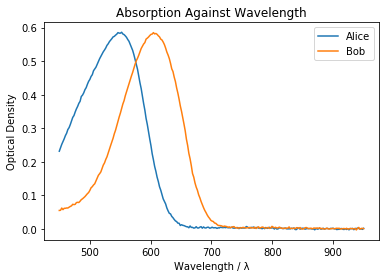

In [49]:
plot(aliceabs_for[0],aliceabs_for[1],label='Alice')
plot(bobabs_for[0],bobabs_for[1], label='Bob')
xlabel('Wavelength / λ')
ylabel('Optical Density')
legend()
title('Absorption Against Wavelength')

In [14]:
aliceflo=loadtxt('Fluorescence_Alice', skiprows=1)
aliceflo_for=formatter(aliceflo)
bobflo=loadtxt('Fluorescence_Bob', skiprows=1)
bobflo_for=formatter(bobflo)

Text(0.5, 1.0, 'Fluorescence Against Wavelength')

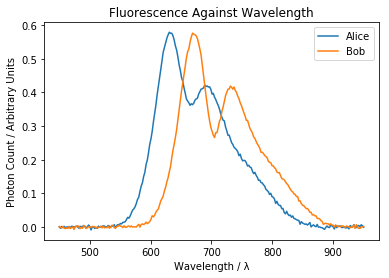

In [50]:
plot(aliceflo_for[0],aliceflo_for[1],label='Alice')
plot(bobflo_for[0],bobflo_for[1], label='Bob')
xlabel('Wavelength / λ')
ylabel('Photon Count / Arbitrary Units')
legend()
title('Fluorescence Against Wavelength')

In [16]:
from scipy.signal import find_peaks

In [77]:
absApeak=find_peaks(aliceabs_for[1], height=0.3)[0]
absBpeak=find_peaks(bobabs_for[1], height=0.3)[0]
fluApeak=find_peaks(aliceflo_for[1], height=0.4)[0]
fluBpeak=find_peaks(bobflo_for[1], height=0.4)[0]

In [83]:
absApeaks=[]
for i in absApeak:
    absApeaks.append([aliceabs_for[0][i]])
abApeak=absApeaks[1]
abApeak

[552.409638554217]

In [126]:
absBpeak

array([77, 79], dtype=int64)

In [84]:
absBpeaks=[]
for i in absBpeak:
    absBpeaks.append([bobabs_for[0][i]])
abBpeak=absBpeaks[1]
abBpeak

[608.634538152611]

In [80]:
floApeaks=[]
for i in fluApeak:
    floApeaks.append([aliceflo_for[0][i]])
floApeak=floApeaks[1]+floApeaks[4]
floApeak

[634.738955823293, 696.987951807229]

In [82]:
floBpeaks=[]
for i in fluBpeak:
    floBpeaks.append([bobflo_for[0][i]])
floBpeak=floBpeaks[0]+floBpeaks[1]
floBpeak

[668.875502008032, 731.124497991968]

In [18]:
TA=loadtxt('Transient-Absorption_2D-DATA.mx3')

In [19]:
wavelength=TA[1:,0]
delaytimes=TA[0,1:]
transmission= TA[1:,1:]

Choosing a delay time and investigating intensity varies with wavelength

for time at 20s which corresponds to index 7500

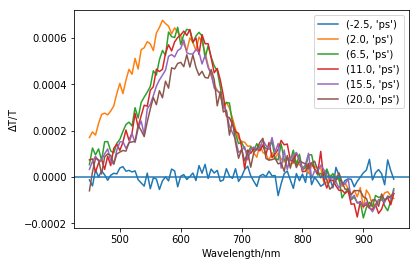

In [107]:
plot(wavelength, TA[1:,6], label=(delaytimes[0], "ps"))
plot(wavelength, TA[1:,1500], label=(delaytimes[1500], "ps"))
plot(wavelength, TA[1:,3000], label=(delaytimes[3000], 'ps'))
plot(wavelength, TA[1:,4500], label=(delaytimes[4500], 'ps'))
plot(wavelength, TA[1:,6000], label=(delaytimes[6000],'ps'))
plot(wavelength, TA[1:,7501], label=(delaytimes[7500],'ps'))
axhline(y=0)
xlabel('Wavelength/nm')
ylabel('$\Delta$T/T')
legend(loc='upper right')

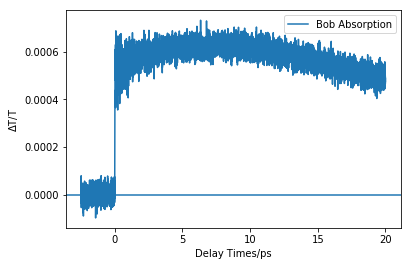

In [131]:
#plot(delaytimes, TA[21,1:], label="Alice Absorption")
plot(delaytimes, TA[32,1:], label="Bob Absorption")
axhline(y=0)
xlabel('Delay Times/ps')
ylabel('$\Delta$T/T')
legend(loc='upper right')

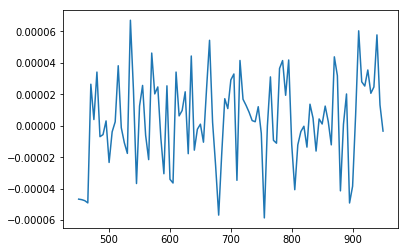

In [21]:
plot(wavelength, TA[1:,5])
#before time step is noise


3.5


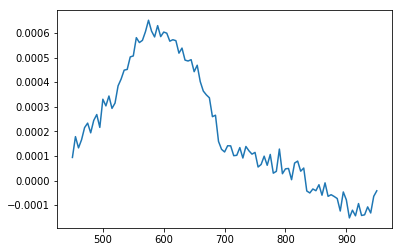

In [22]:
plot(wavelength, TA[1:,2001])
print(delaytimes[2000])


In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

<Figure size 432x288 with 0 Axes>

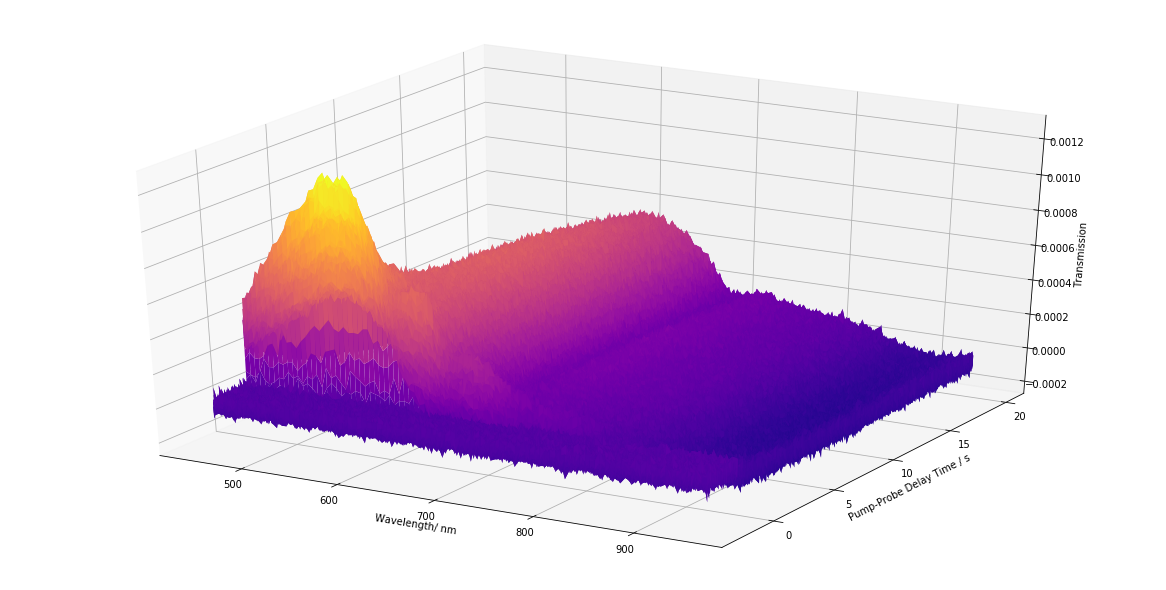

In [37]:
figure()
x=wavelength
y=delaytimes
z=transmission
fig=plt.figure(figsize = (16,8))
ax =Axes3D(fig)
x, y =np.meshgrid(x,y)
surf= ax.plot_surface(x,y,transpose(z), rstride=1 , cstride=1, cmap='plasma')
ax.set_xlabel('Wavelength/ nm')
ax.set_ylabel('Pump-Probe Delay Time / s')
ax.set_zlabel('Transmission')
show()

In [23]:
SVD=numpy.linalg.svd(transmission, full_matrices=True, compute_uv=True)

In [24]:
SVD[0]

array([[-0.03534575, -0.10138345,  0.06436161, ...,  0.01077357,
        -0.01073956,  0.04269129],
       [-0.03905228, -0.10987008,  0.06717214, ...,  0.03611916,
        -0.0265907 , -0.14721227],
       [-0.04051695, -0.12097038,  0.07069716, ...,  0.05970808,
         0.02444296,  0.03477039],
       ...,
       [ 0.03054234, -0.02594446,  0.06368404, ...,  0.01967795,
        -0.05644485, -0.0039069 ],
       [ 0.02693263, -0.02026329,  0.04875338, ..., -0.10510209,
         0.15067203,  0.19441653],
       [ 0.02313852, -0.01451708,  0.03295776, ...,  0.1033606 ,
         0.03520247, -0.04873731]])

In [25]:
len(transmission)

101

In [26]:
transmission

array([[-1.02420319e-05, -7.90105144e-05, -1.12193755e-05, ...,
         5.68455200e-05,  2.44293897e-05, -6.02364360e-05],
       [-2.90735137e-06, -1.05426039e-06,  3.68984204e-05, ...,
         5.58399084e-05,  6.92552453e-05,  2.11499710e-05],
       [-2.90554638e-05, -1.75890944e-05, -1.07963992e-05, ...,
         4.98155018e-05,  6.37731553e-05,  7.96290485e-05],
       ...,
       [-5.29027700e-06,  2.55985665e-05,  2.89373550e-05, ...,
        -1.04595061e-04, -7.62748700e-05, -8.78704498e-05],
       [ 2.65971816e-05, -9.34980519e-06, -1.70873094e-05, ...,
        -5.33965613e-05, -1.43604208e-05, -8.49543935e-05],
       [-2.43185169e-05, -4.16879803e-05,  3.43474726e-06, ...,
        -3.70907191e-05, -2.22200837e-05, -7.14324700e-05]])

In [27]:
U, s, V = SVD
print('U; kinetics; c(t)',U)
print('s; single values=',s)
print('V*; spectra; epsilon',V)

U; kinetics; c(t) [[-0.03534575 -0.10138345  0.06436161 ...  0.01077357 -0.01073956
   0.04269129]
 [-0.03905228 -0.10987008  0.06717214 ...  0.03611916 -0.0265907
  -0.14721227]
 [-0.04051695 -0.12097038  0.07069716 ...  0.05970808  0.02444296
   0.03477039]
 ...
 [ 0.03054234 -0.02594446  0.06368404 ...  0.01967795 -0.05644485
  -0.0039069 ]
 [ 0.02693263 -0.02026329  0.04875338 ... -0.10510209  0.15067203
   0.19441653]
 [ 0.02313852 -0.01451708  0.03295776 ...  0.1033606   0.03520247
  -0.04873731]]
s; single values= [0.23319523 0.05161082 0.00622929 0.00280779 0.00279126 0.00277767
 0.00276784 0.00274991 0.00274802 0.00273649 0.00273246 0.00271455
 0.00270706 0.0026997  0.00269071 0.00267558 0.00266928 0.00266389
 0.00266282 0.00265106 0.00264357 0.00263795 0.00263084 0.00262758
 0.00261853 0.00261437 0.00259864 0.00259374 0.00259165 0.00258472
 0.00257884 0.00256385 0.00255374 0.00254606 0.00254323 0.00253276
 0.00252655 0.00251937 0.0025129  0.00250708 0.00249371 0.00249158
 0.0

Transmission for first 2 singular values

Text(0.5, 1.0, 'SVD Singular Values')

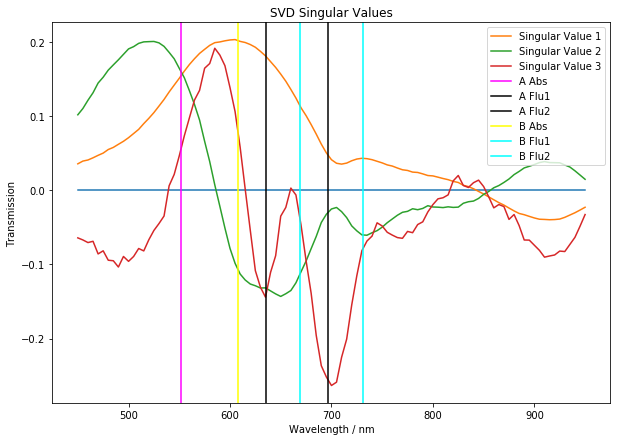

In [151]:
wavelength=arange(450,955,5)
figsize(10,7)
yxx=linspace(0,0,101)
plot(wavelength,yxx)
plot(wavelength,-1*U[:,0],label='Singular Value 1')
plot(wavelength,-1*U[:,1],label='Singular Value 2')
plot(wavelength,-1*U[:,2],label='Singular Value 3')
axvline(x=552, label='A Abs', color='magenta')
axvline(x=635, label='A Flu1', color='black')
axvline(x=697, label='A Flu2', color='black')
axvline(x=608, label='B Abs', color='yellow')
axvline(x=669, label='B Flu1', color='cyan')
axvline(x=731, label='B Flu2', color='cyan')
plot()
xlabel('Wavelength / nm')
ylabel('Transmission')
legend(loc='upper right')
title('SVD Singular Values')

In [29]:
attempty_2=-1*V[0]

first singular value kinetics

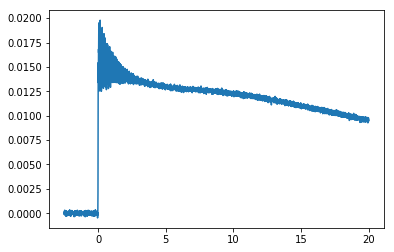

In [30]:
plot(delaytimes,-1*V[0])


In [31]:
len(V[:,0])

7501

In [32]:
attempty=-1*V[1]

second singular value kinetics

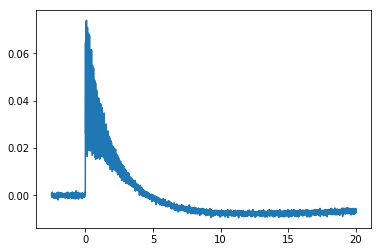

In [33]:
plot(delaytimes,-1*V[1])

In [34]:
delaytimes[833]# 0 time is delaytime[834]

-0.00099999999999989

In [35]:
from scipy.optimize import curve_fit
from scipy import optimize

In [36]:
def func(x,a,b,c):
    return a* np.exp(-b*x) + c
params,params_covariance= optimize.curve_fit(func,delaytimes[834:],attempty[834:])

Text(0, 0.5, 'Transmission')

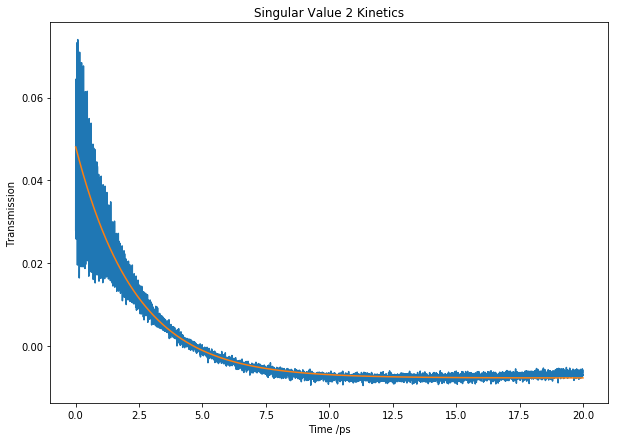

In [155]:
plot(delaytimes[834:],attempty[834:])
plot(delaytimes[834:],func(delaytimes[834:],params[0],params[1], params[2]))
title('Singular Value 2 Kinetics')
xlabel('Time /ps')
ylabel('Transmission')

In [156]:
params[1]

0.4261275105005692

In [38]:
params1,params_covariance1= optimize.curve_fit(func,delaytimes[834:3500],attempty_2[834:3500])

Text(0, 0.5, 'Transmission')

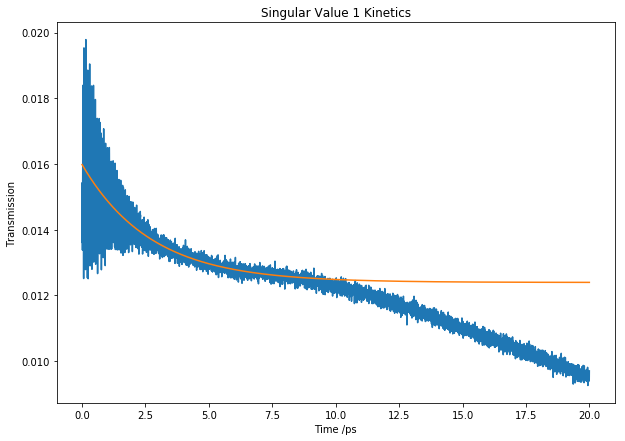

In [157]:
plot(delaytimes[834:],attempty_2[834:])
plot(delaytimes[834:],func(delaytimes[834:],params1[0],params1[1], params1[2]))
title('Singular Value 1 Kinetics')
xlabel('Time /ps')
ylabel('Transmission')

In [159]:
params1[1]

0.3682104693365368

In [40]:
osc_y_2=func(delaytimes[834:],params1[0],params1[1], params1[2])

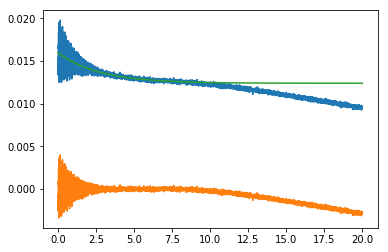

In [41]:
plot(delaytimes[834:],attempty_2[834:])
plot(delaytimes[834:],attempty_2[834:]-osc_y_2)
plot(delaytimes[834:],func(delaytimes[834:],params1[0],params1[1], params1[2]))

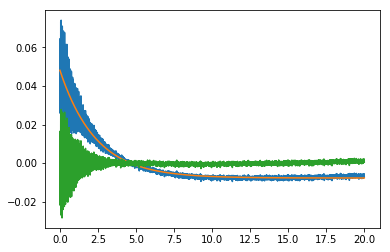

In [42]:
osc_y_1=func(delaytimes[834:],params[0],params[1], params[2])
plot(delaytimes[834:],attempty[834:])
plot(delaytimes[834:],func(delaytimes[834:],params[0],params[1], params[2]))
plot(delaytimes[834:],attempty[834:]-osc_y_1)


In [43]:
preFTK=attempty[834:]-osc_y_1

In [44]:
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq

Text(0.5, 1.0, 'Second Singular Value Vibronic Spectrum')

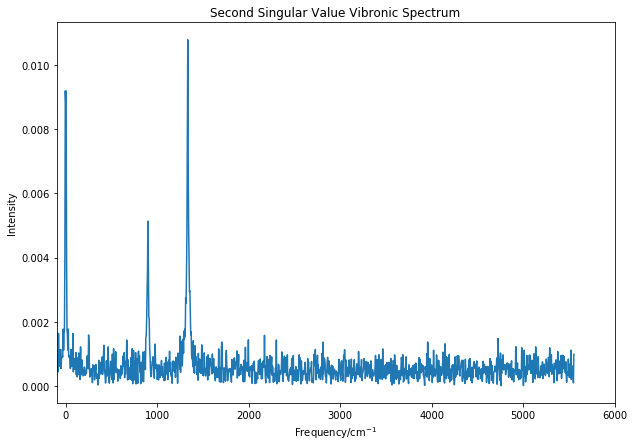

In [173]:
#d is spacing between each time
abs1 = fftshift(fft(attempty[1600:4000]-osc_y_1[766:3166],norm="ortho")) 
freq=fftshift(fftfreq(len(delaytimes[1600:4000]),d=0.003)) *33.3564
plot(freq, abs(abs1))
xlim(-100,6000)
xlabel('Frequency/cm$^{-1}$')
ylabel('Intensity')
title('Second Singular Value Vibronic Spectrum')

Text(0.5, 1.0, 'First Singular Value Vibronic Spectrum')

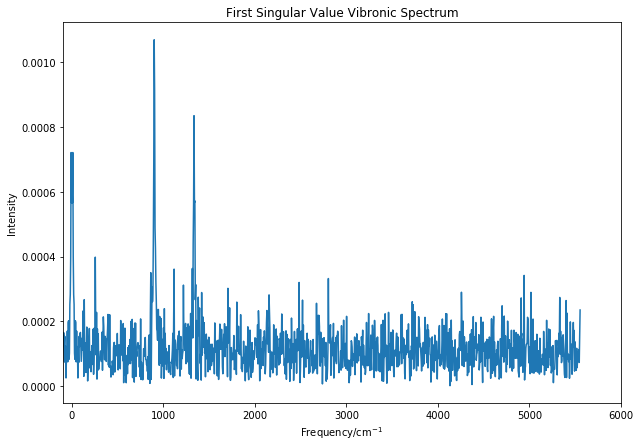

In [171]:
abs2 = fftshift(fft(attempty_2[1600:4000]-osc_y_2[766:3166],norm="ortho")) 
freq2=fftshift(fftfreq(len(delaytimes[1600:4000]),d=0.003)) *33.3564
plot(freq2, abs(abs2))
xlim(-100,6000)
xlabel('Frequency/cm$^{-1}$')
ylabel('Intensity')
title('First Singular Value Vibronic Spectrum')

In [187]:
def func2(x,a,b,c):
    return a* np.exp(-b*x) + c
params,params_covariance= optimize.curve_fit(func,delaytimes[834:],TA[21,835:])

In [183]:
def double(x,a,b,c,d,e):
    return a* np.exp(-b*x)+c*exp(-d*x) + e
params,params_covariance= optimize.curve_fit(double,delaytimes[834:],TA[31,835:])

C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


Text(0, 0.5, 'Transmission')

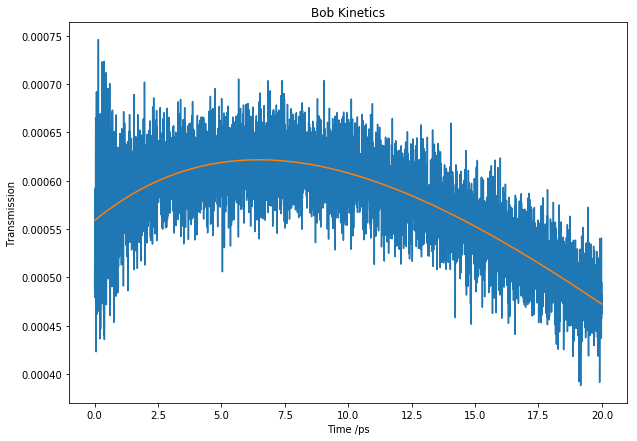

In [184]:
plot(delaytimes[834:],TA[31,835:])
plot(delaytimes[834:],double(delaytimes[834:],params[0],params[1], params[2],params[3], params[4]), label='Bob')
title('Bob Kinetics')
xlabel('Time /ps')
ylabel('Transmission')

Text(0, 0.5, 'Transmission')

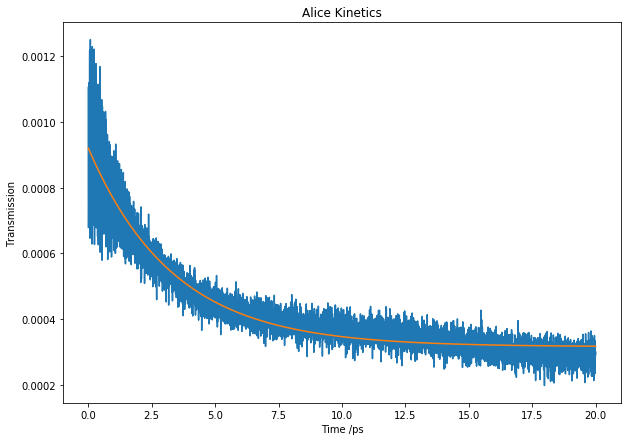

In [189]:
plot(delaytimes[834:],TA[21,835:])
plot(delaytimes[834:],func2(delaytimes[834:],params[0],params[1], params[2]),label='Alice')
title('Alice Kinetics')
xlabel('Time /ps')
ylabel('Transmission')

In [190]:
resa=TA[21,835:]-func2(delaytimes[834:],params[0],params[1],params[2])

In [185]:
resb=TA[31,835:]-double(delaytimes[834:],params[0],params[1], params[2],params[3], params[4])

Text(0.5, 1.0, 'Alice and Bob Raman Spectra')

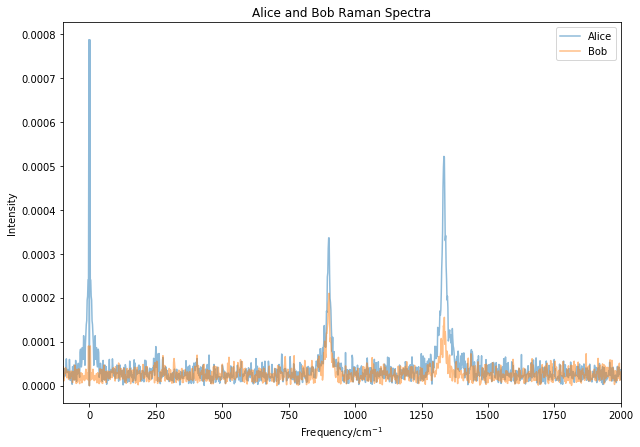

In [205]:
absb = fftshift(fft(resb,norm="ortho")) 
freqb=fftshift(fftfreq(len(delaytimes[834:]),d=0.003)) *33.3564
absa=fftshift(fft(resa,norm='ortho'))

plot(freqb,abs(absa), label='Alice',alpha=0.5)
plot(freqb, abs(absb),label='Bob', alpha=0.5)
xlim(-100,2000)
xlabel('Frequency/cm$^{-1}$')
ylabel('Intensity')
legend(loc='upper right')
title('Alice and Bob Raman Spectra')